# Наивная баесовская классификация

Наивные баесовские классификаторы - исключительно быстрые модели, которые могут работать с многомерными данными. Мало настраиваемых параметров, поэтому часто используются как эталонные модели.

## Баесовская классификация

Поиск вероятности метки при определенных заданных признаках, являющихся результатом наблюдений 

$P(L | признаков) = \frac{P(признаков | L) P(L)}{P(признаков)}$

Один из способов выбора между двумя метками l1 и Д2 - вычисление отношения апостериорнох вероятностей для каждой из них

$\frac{P(L_{1} | признаков)}{P(L_{2} | признаков)} = \frac{P(признаков | L_{1}) P(L_{1})}{P(признаков | L_{2}) P(L_{2})}$

Модель вычисляет $P(признаков | L_{i})$ и такая модель называется порождающей, так как определяет гипотетический случайный процесс генерации данных.

"Наивным" классификатор становится из-за того, что делается "наивное" допущение относительно порождающей модели для каждой из меток. Разные наивные классификаторы основаны на разных моделях.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Гаусов наивный классификатор (данные распределены по гаусу)

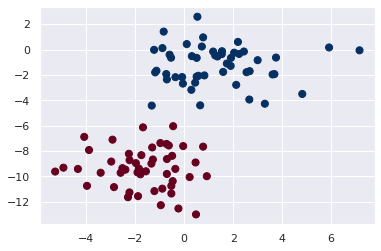

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

для обучения достаточно найти среднее значение и стандартное отклонение точек внутри каждой категории

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [4]:
# проверим
rnd = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rnd.rand(2000, 2)
ynew = model.predict(Xnew)

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

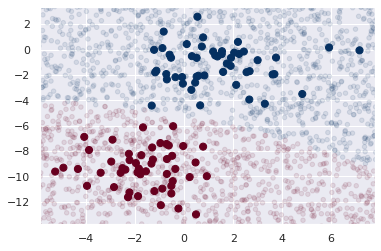

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

Плюс классификатора - возможность расчитать естественную вероятность классификации predict_proba

In [6]:
yprob = model.predict_proba(Xnew)
yprob.round(2)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### Полиномиальный наивный баесовский классификатор

допущение - признаки распределены  на основе простого полиномиального распределения. Полин.распределение описывает вероятность наблюдения количеств вхождений в несколько категорий, поэтому классификатор лучше всего подходит для **признаков, отражающих количество или частоту вхождения**

In [7]:
# классификаиця текстов по частоте вхождения слов
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [9]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [10]:
# векторизуем каждую строку в вектор с помощью TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [11]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(89.18, 0.5, 'predicted label')

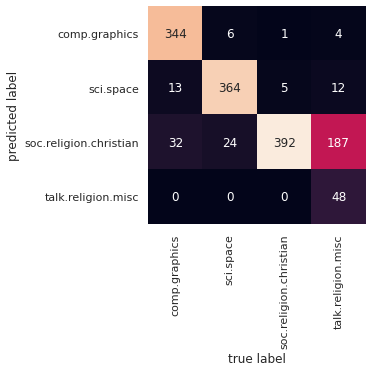

In [12]:
# матрица различий между настоящими и предсказанными метками
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [13]:
# предсказание для каждой отдельной строки
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [14]:
predict_category('sending a payload to the ISS')

'sci.space'

In [15]:
predict_category('religious people wait for ctistmas')

'soc.religion.christian'

## Когда использовать наивный баес?

- выполняют обучение и предсказание очень быстро
- обеспечивают простое вероятностное предсказание
- результаты часто легки в интерпретации
- мало или нет вообще параметров

Хорошо работают:

- когда данные действительно соответствуют наивным допущениям
- для хорошо разделяемых моделей, когда сложность неважна
- для многомерных данных (чем выше размерность, тем лучше)

## Линейная регрессия

### Простая лин.регрессия

Прямолинейная аппроксимация $y = ax + b$. a - угловой коэфициент, b - сдвиг (точка пересечения с осью Y)

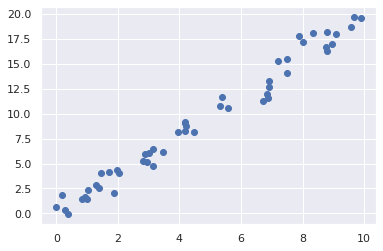

In [16]:
rnd = np.random.RandomState(1)
x = 10 * rnd.rand(50)
y = 2 * x - + rnd.randn(50)
plt.scatter(x, y)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [18]:
model.fit(x[:, np.newaxis], y)

LinearRegression()

In [21]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

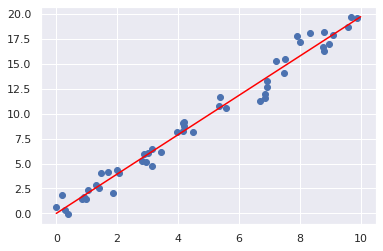

In [23]:
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')

In [24]:
# угловой клэф. и сдвиг
print('Model slope {0}, intercept {1}'.format(model.coef_[0], model.intercept_))

Model slope 1.9727911896393042, intercept -0.001422914446793655


### Многомерные линейные модели

$y - a_0 + a_1 x_1 + a_2 x_2 + ...$

геометрически это подбор плоскости (для трехмерного) или гиперплоскости (для нескольких измеренеий), разделяющих точки.

In [27]:
X = 10 * rnd.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print('Model slope {0}, intercept {1}'.format(model.coef_, model.intercept_))

Model slope [ 1.5 -2.   1. ], intercept 0.499999999999992


### Регрессия по комбинации базисных функций

$y - a_0 + a_1 x_1 + a_2 x_2 + ...$

где $x_n = f_n (x)$

например если $f_n = x^2$, то 

$y - a_0 + a_1 x + a_2 x^2 + a_3 x^3 ...$

При этом модель остается линейной  - угловые коэф. никогда не умножаются и не делятся друг на друга. Фактически мы выполняем проекцию одномерных данных на многомерное пространство.

#### Полиномиальные базисные функции

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
# преобразуем одномерный массив в трехмерный
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [30]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

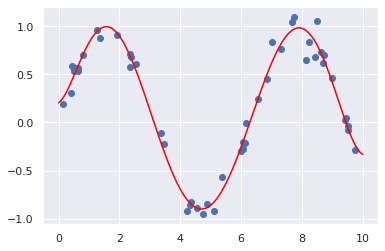

In [31]:
# аппроксимация синусоиды
x = 10 * rnd.rand(50)
y = np.sin(x) + 0.1 * rnd.randn(50)
xfit = np.linspace(0, 10, 1000)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')

#### Гауссовы базисные функции

в базовый пакет не входят, напишем сами

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

(0.0, 10.0)

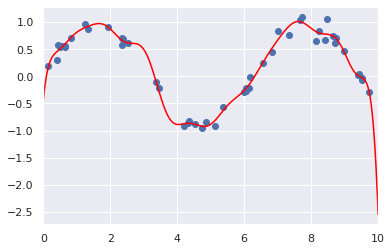

In [34]:
gaus_model = make_pipeline(GaussianFeatures(20),
                          LinearRegression())
gaus_model.fit(x[:, np.newaxis], y)
yfit = gaus_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')
plt.xlim(0, 10)

### Регуляризация

применение базисных функций приводит к быстрмоу переобучению. Чтобы избежать, применяется регуляризация

(-1.5, 1.5)

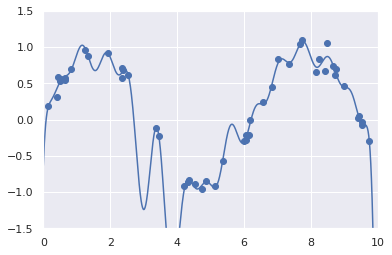

In [35]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

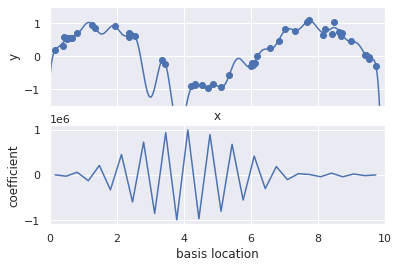

In [36]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

#### Гребневая регрессия (L2 регуляризация)

- ridge regression
- регуляризация Тихонова

штраф накладывается на сумму квадратов (евклидовой нормы) коэффиуиентов модели

$
P = \alpha\sum_{n=1}^N \theta_n^2
$

где $\alpha$ - параметр для управления уровнем штрафа. Когда -> 0, стандартная линейная регрессия. Когда -> inf, любой отклик модели подавляется

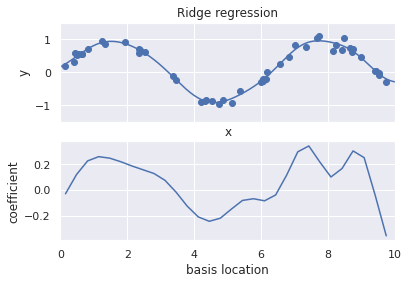

In [38]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30),
                     Ridge(alpha=0.1))
basis_plot(model, title='Ridge regression')

#### Ласс орегуляризация (L1 норма)

штрафуется сумма абсолютных значений коэфициентов модели

$
P = \alpha\sum_{n=1}^N |\theta_n|
$

По геометрическим причинам лассо регрессия любит разреженные модели, т.е. она по возможности делает коэффициенты равными 0

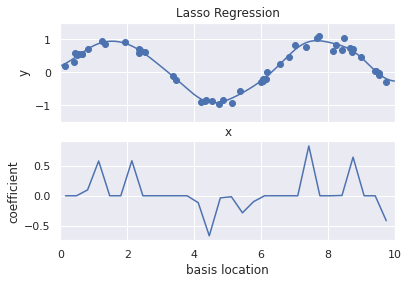

In [39]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')